<Figure size 864x432 with 0 Axes>

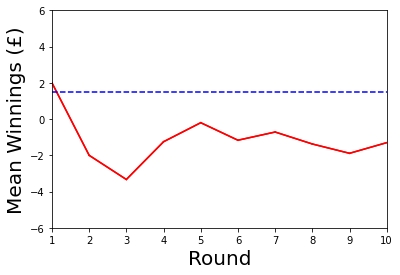

In [4]:
# Import packages
import matplotlib.pyplot as plt
import random as rn
import time as tm

# (The time module will be used to control the speed of the program
# using the function tm.time() to keep track of how much time has passed
# and tm.sleep(number_of_seconds) to pause execution for a set duration.)

# Set the number of repetitions of the game
number_of_plays = 10

# Turn animation on/off
is_animation = True

# The simulation results will be compared with the expected score at the end
expected_score = 1.5

# These capitalised variables will all serve to control the duration of the animation.
TOTAL_SIM_TIME = 10
INITIAL_WAIT   = 1
COMMON_RATIO   = 1 - INITIAL_WAIT/TOTAL_SIM_TIME
UPDATE_INT     = 1
FINAL_WAIT     = 0
MIN_INT        = 0.01
START_TIME     = tm.time()
CURRENT_TIME   = START_TIME

# Interactive plotting:
plt.ion()

# Create the figure on which to plot
fig1 = plt.figure(num=1,figsize=(12,6))

# Show the figure (empty at the moment)
# The .canvas.draw() and .canvas.flush_events() allow for live updating
fig1.clear()
plt.show()
plt.xlim((1,number_of_plays))
plt.ylim((-6,6))
plt.ylabel('Mean Winnings (£)', fontsize=20)
plt.xlabel('Round',fontsize=20)
fig1.canvas.draw()
fig1.canvas.flush_events()


# Here is a function that takes a dice roll and returns your score:
def game_result(dice_roll):
    
    if dice_roll < 6:
        return dice_roll
    else:
        return -6

# Create some variables (and a list) to update later:
rolling_sum = 0.0
rolling_av  = 0.0
rolling_averages = [0]
plot_start = 0

# Play the game many times
for i in range(number_of_plays):
    
    # Roll the dice:
    new_roll = rn.randint(1,6)
    
    # Update the variables
    rolling_sum += game_result(new_roll)
    rolling_av = rolling_sum/(i+1)
    rolling_averages += [rolling_av]
    
    # We need to check the time here to control how fast the graph is being plotted:
    NEW_TIME = tm.time()
    
    # This bit of code displays the updated plot.
    # However, there are some conditions to make sure it doesn't try to update too frequently to prevent the plotting from slowing down.
    if is_animation == True and (i == 0 or NEW_TIME-CURRENT_TIME > MIN_INT):
        
        plt.plot(range(plot_start,i+2),rolling_averages[plot_start-i-2:],'r-')
        fig1.canvas.draw()
        fig1.canvas.flush_events()
        plot_start = i+1
        
        CURRENT_TIME= tm.time()
        
    # How long to wait between iterations...
    # This is set up to accelerate as more of the graph is drawn:
    if is_animation == True:
        WAIT_TIME = INITIAL_WAIT*COMMON_RATIO**i
        tm.sleep(WAIT_TIME)

# A final update, to make sure the complete plot has been displayed:
fig1.clear()
plt.xlim((1,number_of_plays))
plt.ylim((-6,6))
plt.plot(range(number_of_plays+1),rolling_averages,'r-')
fig1.canvas.draw()

# Wait a little:
tm.sleep(FINAL_WAIT)

# Then plot the predicted expected score as a dotted line:
plt.plot([1,number_of_plays],[expected_score]*2,'b--')
fig1.canvas.draw()